In [1]:
import sqlite3
conexao = sqlite3.connect('aluno.db') #cria o banco de dados aluno.db, caso não exista

In [2]:
cursor = conexao.cursor() #retorna um cursor para manipulação do banco de dados    
sql = 'create table aluno('\
'idAluno integer primary key autoincrement,'\
'nome varchar(100) not null,'\
'sexo char)'
 
cursor.execute(sql) #cria a tabela aluno no banco de dados

In [3]:
sql = 'insert into aluno (nome, sexo) values(?,?)'
 
cursor.execute(sql, ['Alexandre', 'M']) #insere apenas um registro
 
alunos = [['Sílvia', 'F'], ['Carlos','M'], ['Maria', 'F']]
 
#inserindo diversos registros
for aluno in alunos:
    cursor.execute(sql, aluno)
   
conexao.commit()

In [4]:
sql = 'select * from aluno'
 
alunos = cursor.execute(sql)
 
for aluno in alunos:
    print(aluno)

(1, 'Alexandre', 'M')
(2, 'Sílvia', 'F')
(3, 'Carlos', 'M')
(4, 'Maria', 'F')


In [5]:
sql = 'select * from aluno where idaluno >= ? and sexo = ?'
 
alunos = cursor.execute(sql, [2, 'F'])
 
for id, nome, sexo in alunos: #acessando cada campo individualmente
    print(id, nome, sexo)

2 Sílvia F
4 Maria F


In [6]:
sql = 'select * from aluno where idaluno >= ? and sexo = ?'
 
alunos = cursor.execute(sql, [2, 'F'])
 
lAlunos = list(alunos)
print(lAlunos)

[(2, 'Sílvia', 'F'), (4, 'Maria', 'F')]


In [7]:
import pandas as pd

# Carregando dados do SQLite para o pandas
df = pd.read_sql_query("SELECT * from aluno", conexao)
 
df

,idAluno,nome,sexo
0,1,Alexandre,M
1,2,Sílvia,F
2,3,Carlos,M
3,4,Maria,F


<Axes: xlabel='sexo'>

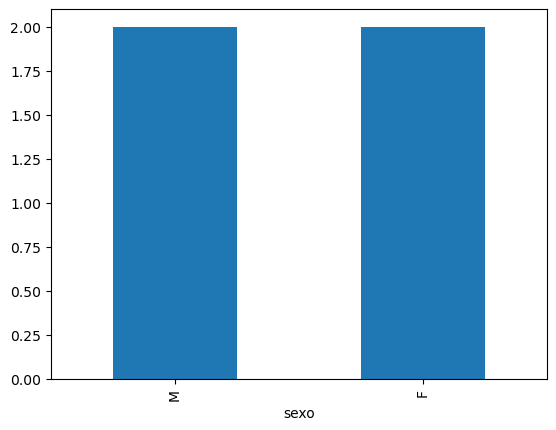

In [8]:
df['sexo'].value_counts()
 
df['sexo'].value_counts().plot(kind = 'bar')

In [9]:
temp = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')
 
 
conn = sqlite3.connect('weather.db')
temp.to_sql('temperatura', conn, if_exists='replace') #{'fail', 'replace', 'append'}, default 'fail'

748

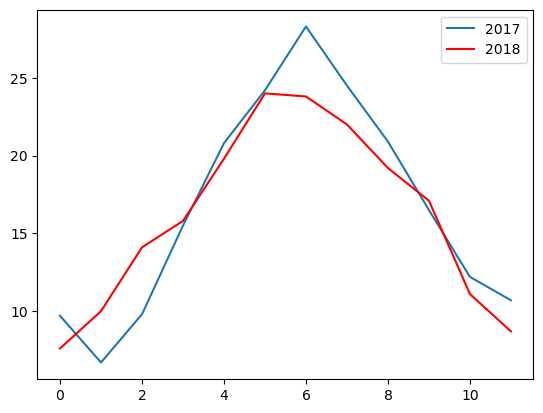

In [10]:
y2018 = pd.read_sql('SELECT * FROM temperatura WHERE Year == 2018', conn)
y2017 = pd.read_sql('SELECT * FROM temperatura WHERE Year == 2017', conn)
 
ax2018 = y2018.plot(y = 'Tmax')
ax = y2017.plot(y='Tmax',color = 'red', ax=ax2018)
ax.legend(['2017','2018'])

<Axes: xlabel='Year'>

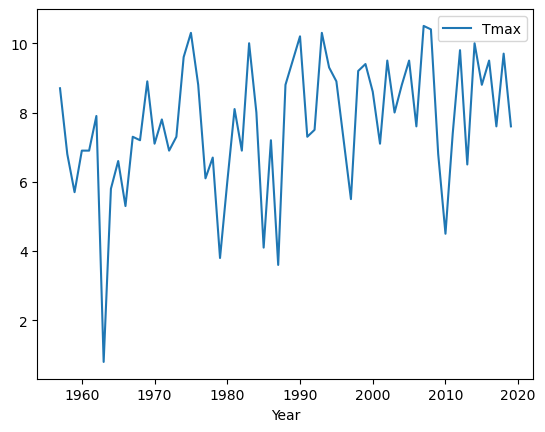

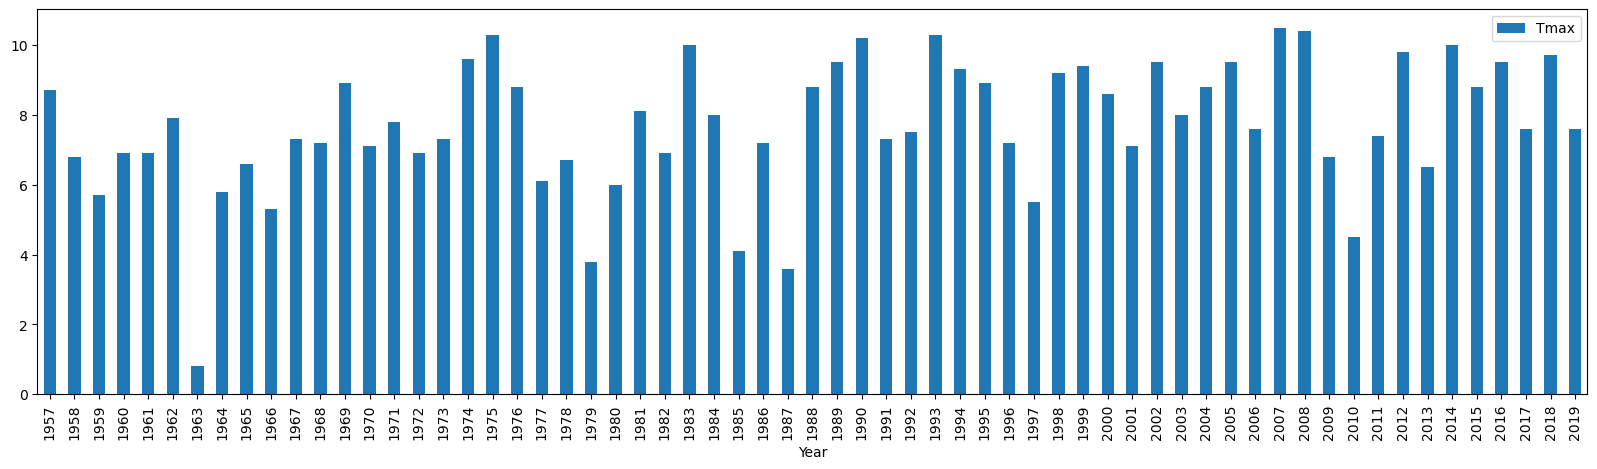

In [11]:
mesJaneiro = pd.read_sql('SELECT year, tmax FROM temperatura WHERE month = 1', conn)
#Gráfico de linhas
mesJaneiro.plot(y='Tmax', x = 'Year')
 
#Gráfico de barras
mesJaneiro.plot(y='Tmax', x = 'Year', kind = 'bar', figsize=(20,5))
 

<Axes: xlabel='Month'>

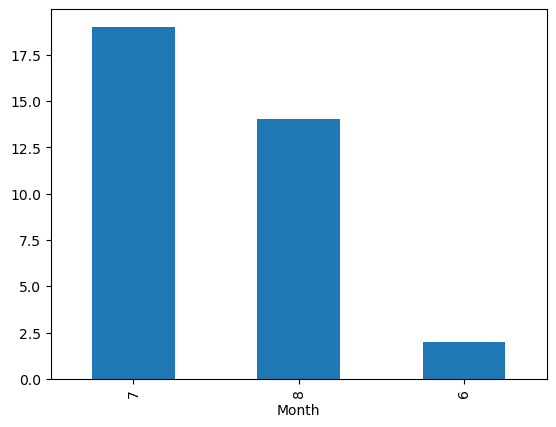

In [12]:
import matplotlib.pyplot as plt
mesMaior = pd.read_sql('SELECT Month, tmax FROM temperatura WHERE tmax > 24', conn)
 
mesMaior['Month'].value_counts()
mesMaior['Month'].value_counts().plot(kind = 'bar')

Média empregado A: 87.16666666666667
Média empregado B: 87.5
Amplitude empregado A: 4
Amplitude empregado B: 38


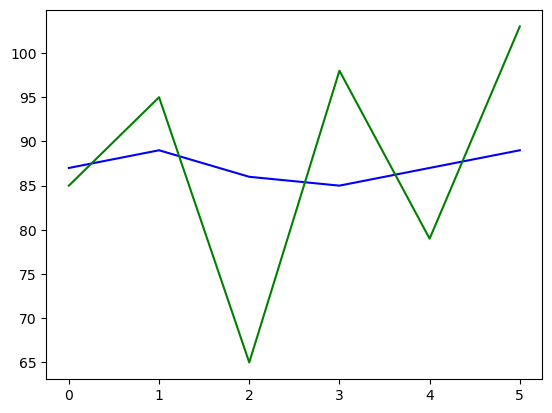

In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
empregado_A = [87, 89, 86, 85, 87, 89]
 
empregado_B = [85, 95, 65, 98, 79, 103]
 
print("Média empregado A:", np.mean(empregado_A))
print("Média empregado B:", np.mean(empregado_B))
 
print("Amplitude empregado A:", max(empregado_A) - min(empregado_A))
print("Amplitude empregado B:", max(empregado_B) - min(empregado_B))
plt.plot(empregado_A, color = 'blue');
plt.plot(empregado_B, color = 'green');
 
 

(10.0, 100.0)

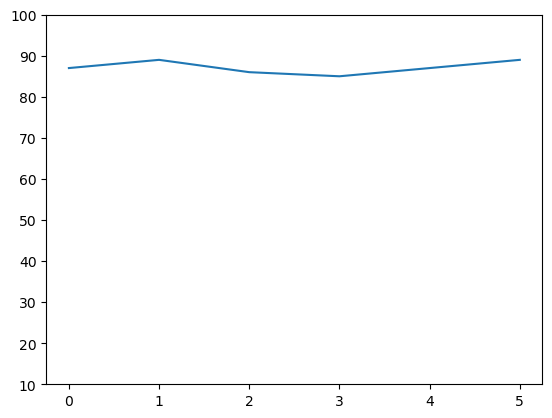

In [ ]:
plt.plot([87, 89, 86, 85, 87, 89]);
plt.ylim(10, 100)

In [4]:
?plt.plot

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

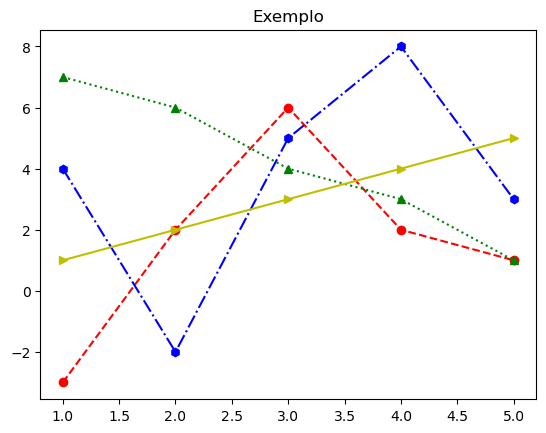

In [7]:
x = [1, 2, 3, 4, 5]
y1 = [-3, 2, 6, 2, 1]
y2 = [4, -2, 5, 8, 3]
y3 = [7, 6, 4, 3, 1]
y4 = [1, 2, 3, 4, 5]
 
plt.plot(x, y1, 'ro--', x, y2, 'bh-.', x, y3, 'g^:', x, y4, 'y>-')
plt.title("Exemplo");
 
 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
weather = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')
 
weather.head()
 
# Pegando o numeração dos meses avaliados
x_periodo = weather[weather['Year'] == 1957].Month
 
# Pegando os dados de temperaturas
y_temperaturas_1957 = weather[weather['Year'] == 1957].Tmax
y_temperaturas_1977 = weather[weather['Year'] == 1977].Tmax
y_temperaturas_1997 = weather[weather['Year'] == 1997].Tmax
y_temperaturas_2017 = weather[weather['Year'] == 2017].Tmax

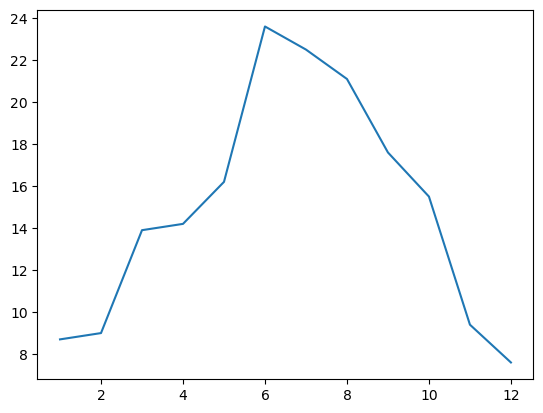

In [10]:
plt.plot(x_periodo, y_temperaturas_1957);

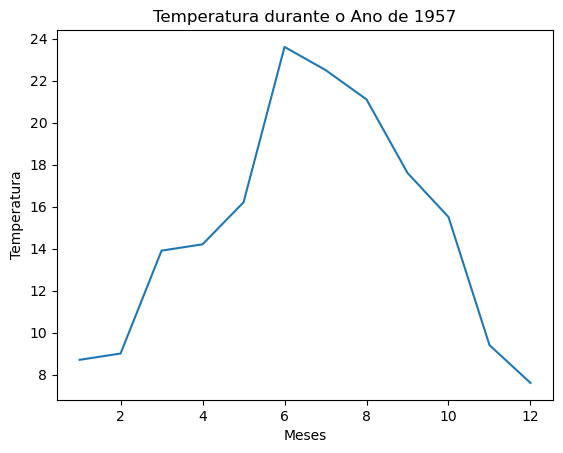

In [13]:
plt.plot(x_periodo, y_temperaturas_1957)
plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses");

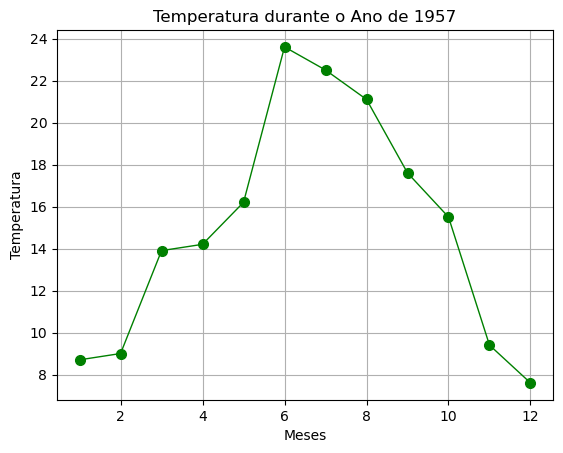

In [18]:
plt.plot(x_periodo, y_temperaturas_1957, color='green', marker='o', linewidth=1, markersize=7)
plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid();#axis=‘both’,’x’ou ’y’

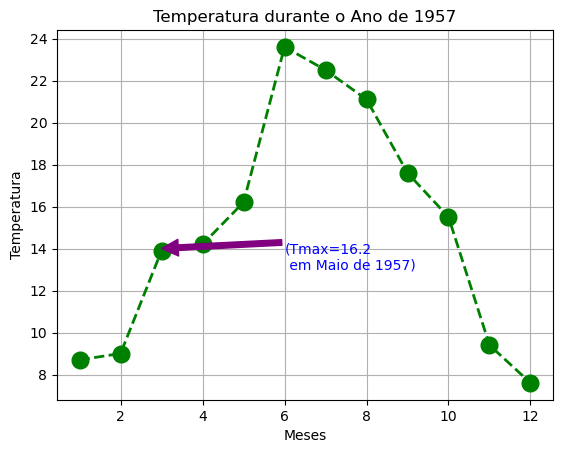

In [22]:
plt.plot(x_periodo, y_temperaturas_1957, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.annotate('(Tmax=16.2\n em Maio de 1957)', color = 'blue', xy=(3, 14), xytext=(6,13), arrowprops=dict(color='purple'))
plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid();#axis=‘both’,’x’ou ’y’

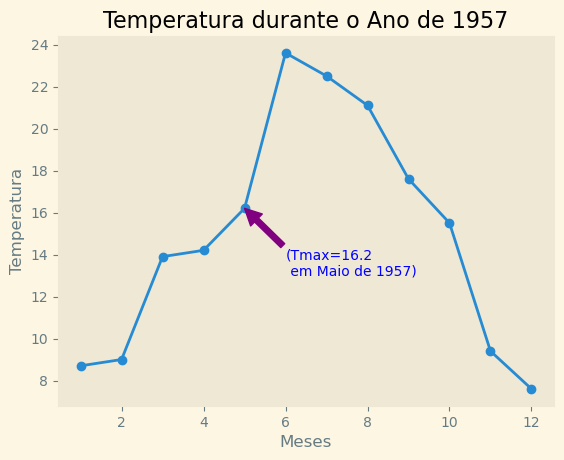

In [25]:
plt.rcdefaults()
plt.style.use('Solarize_Light2')
 
plt.plot(x_periodo, y_temperaturas_1957, marker='o')
plt.annotate('(Tmax=16.2\n em Maio de 1957)', color = 'blue', xy=(5, 16.2), xytext=(6,13), arrowprops=dict(color='purple'))
 
plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid();#axis=‘both’,’x’ou ’y’

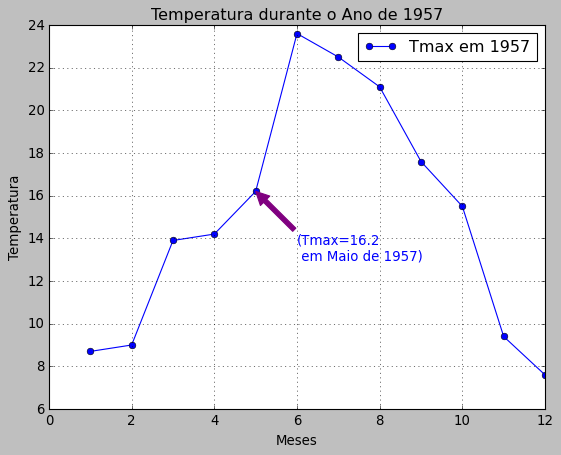

In [26]:
plt.rcdefaults()
plt.style.use('classic')
plt.plot(x_periodo, y_temperaturas_1957, marker='o', label="Tmax em 1957")
 
plt.annotate('(Tmax=16.2\n em Maio de 1957)', color = 'blue', xy=(5, 16.2), xytext=(6,13), arrowprops=dict(color='purple'))
 
plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid()
plt.legend();

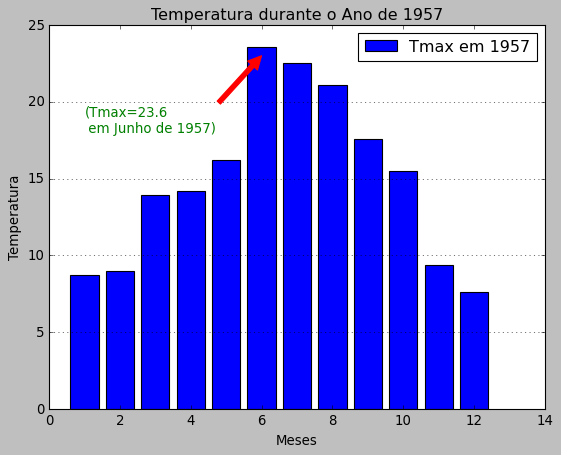

In [28]:
plt.rcdefaults()
plt.style.use('classic')
plt.bar(x_periodo, y_temperaturas_1957, label="Tmax em 1957")
 
plt.annotate('(Tmax=23.6\n em Junho de 1957)', color = 'green', xy=(6, 23), xytext=(1,18), arrowprops=dict(color='red'))
 
plt.title("Temperatura durante o Ano de 1957")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid(axis='y')
plt.legend();
 

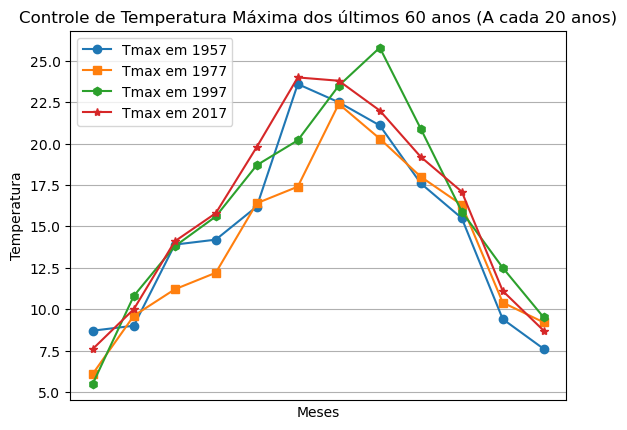

In [29]:
plt.rcdefaults()
 
plt.plot(x_periodo, y_temperaturas_1957, label = "Tmax em 1957", marker = 'o')
plt.plot(x_periodo, y_temperaturas_1977, label = "Tmax em 1977", marker = 's')
plt.plot(x_periodo, y_temperaturas_1997, label = "Tmax em 1997", marker = 'h')
plt.plot(x_periodo, y_temperaturas_2017, label = "Tmax em 2017", marker = '*')
 
plt.title("Controle de Temperatura Máxima dos últimos 60 anos (A cada 20 anos)")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid()
plt.xticks([]) # Oculta rótulo x
plt.legend();

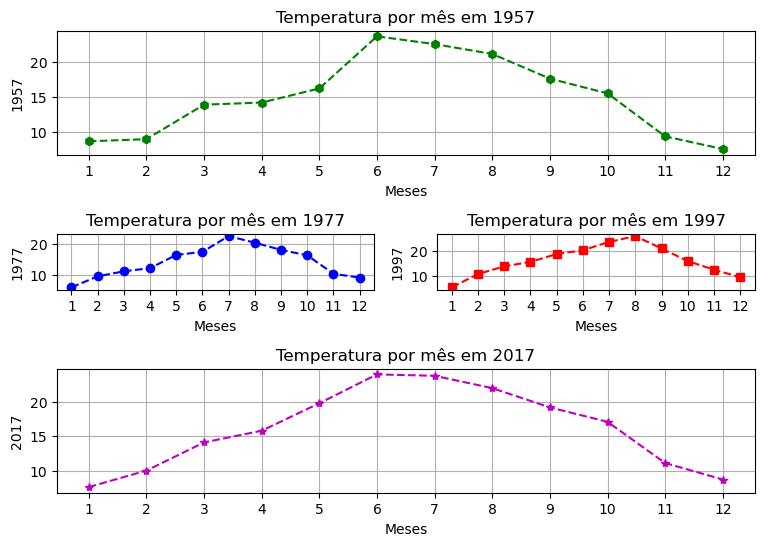

In [30]:
gridsize = (7, 2)
fig = plt.figure(figsize=(9, 6)) #default (6.4, 4.8)
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) # 1957
ax2 = plt.subplot2grid(gridsize, (3, 0)) # 1977
ax3 = plt.subplot2grid(gridsize, (3, 1)) # 1997
ax4 = plt.subplot2grid(gridsize, (5, 0), colspan=2, rowspan=2) # 2017
 
ax1.set_title('Temperatura por mês em 1957')
ax1.plot(x_periodo, y_temperaturas_1957, 'gh--')
ax1.set_xlabel('Meses')
ax1.set_ylabel('1957')
ax1.set_xticks(x_periodo)
ax1.grid()
 
ax2.set_title('Temperatura por mês em 1977')
ax2.plot(x_periodo, y_temperaturas_1977, 'bo--')
ax2.set_xlabel('Meses')
ax2.set_ylabel('1977')
ax2.set_xticks(x_periodo)
ax2.grid()
 
ax3.set_title('Temperatura por mês em 1997')
ax3.plot(x_periodo, y_temperaturas_1997, 'rs--')
ax3.set_xlabel('Meses')
ax3.set_ylabel('1997')
ax3.set_xticks(x_periodo)
ax3.grid()
 
ax4.set_title('Temperatura por mês em 2017')
ax4.plot(x_periodo, y_temperaturas_2017, 'm*--')
ax4.set_xlabel('Meses')
ax4.set_ylabel('2017')
ax4.set_xticks(x_periodo)
ax4.grid()